In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

First we create a dataset for the lecture.

In [3]:
X, y = datasets.make_blobs(
                           n_samples=1000,
                           n_features=2,
                           centers=4,
                           random_state=42,
                           cluster_std=1.4
                           )

In [4]:
X.shape

(1000, 2)

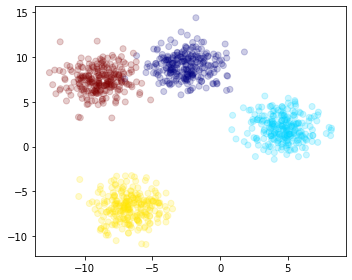

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(X[:,0], X[:,1], c=y, alpha=.2, cmap='jet')
plt.tight_layout()

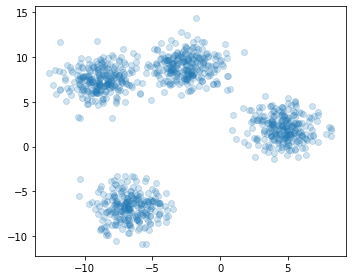

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(X[:,0], X[:,1], alpha=.2, cmap='jet')
plt.tight_layout()

This is  what the algorith "sees" and tries to sepaatethe clusters.

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(X)
model.labels_

C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 3, 2, 2, 2, 3, 3, 3, 0, 0, 1,
       1, 1, 0, 0, 3, 3, 2, 0, 2, 2, 2, 3, 3, 1, 2, 0, 1, 1, 0, 2, 0, 1,
       0, 1, 3, 0, 1, 0, 2, 3, 0, 1, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 0, 3,
       2, 2, 0, 3, 1, 3, 0, 2, 0, 1, 0, 3, 0, 3, 2, 3, 3, 3, 0, 1, 2, 2,
       3, 3, 3, 3, 0, 0, 1, 0, 1, 3, 0, 2, 0, 1, 1, 1, 1, 0, 0, 3, 2, 3,
       1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 3, 2, 1, 0, 1, 2, 0, 1, 2, 0, 3, 2,
       0, 1, 0, 1, 3, 2, 0, 0, 3, 3, 1, 1, 1, 0, 0, 3, 3, 3, 3, 1, 2, 2,
       3, 0, 3, 0, 0, 1, 2, 3, 0, 2, 3, 3, 0, 2, 1, 2, 0, 3, 3, 0, 3, 1,
       2, 1, 2, 1, 0, 0, 3, 2, 3, 2, 0, 1, 3, 2, 0, 3, 0, 0, 3, 1, 2, 2,
       2, 1, 3, 2, 0, 3, 0, 0, 2, 3, 0, 2, 2, 1, 2, 2, 0, 3, 2, 3, 1, 0,
       1, 1, 2, 3, 1, 3, 0, 2, 2, 3, 3, 2, 3, 1, 2, 2, 1, 2, 2, 0, 2, 1,
       2, 0, 1, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 2, 3, 2, 2, 0, 0, 0, 1, 0,
       1, 1, 2, 0, 3, 1, 0, 3, 0, 2, 3, 1, 0, 1, 2, 0, 1, 2, 1, 0, 2, 3,
       3, 2, 3, 1, 1, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2,

In [8]:
model.cluster_centers_

array([[ 4.66469562,  2.04847655],
       [-8.86332959,  7.45744073],
       [-6.69175808, -6.78688075],
       [-2.48392421,  9.03577635]])

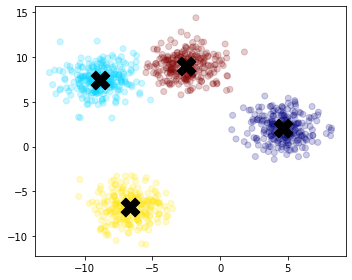

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(X[:,0], X[:,1], c=model.labels_, alpha=.2, cmap='jet')
ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=350, c='k', marker='X')
plt.tight_layout()

### How does work KMeans?

First the algorithm selects centroids randomly. Then it calculates the closest points to each centroid.

In order to predict the correct points KMeans uses iteration.

It moves the centroids to the mean of each centroid points and starts again iterating until centroid position no longer changes.

In [10]:
# RESERVADO PARA LA VISUALIZACION PREPARADA POR EL PROFESOR

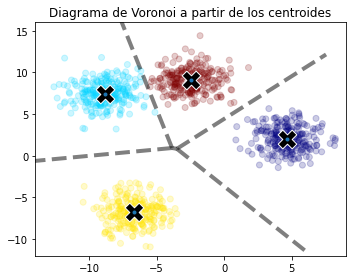

In [11]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(model.cluster_centers_)
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(X[:, 0], X[:, 1], c=model.labels_, alpha=.2, cmap='jet')
fig = voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=4, edgecolors='w', line_alpha=.5)

ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=350, c='k', marker='X', edgecolors='w')

ax.set_title('Diagrama de Voronoi a partir de los centroides')
ax.set_xlim(-14, 9)
ax.set_ylim(-12, 16)
plt.tight_layout()

If we try to predict one point the model predicts it correctly.

In [12]:
model.predict([[0, -10]])

array([2])

In [13]:
model.cluster_centers_

array([[ 4.66469562,  2.04847655],
       [-8.86332959,  7.45744073],
       [-6.69175808, -6.78688075],
       [-2.48392421,  9.03577635]])

In [14]:
from yellowbrick.cluster import KElbowVisualizer


C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\clust

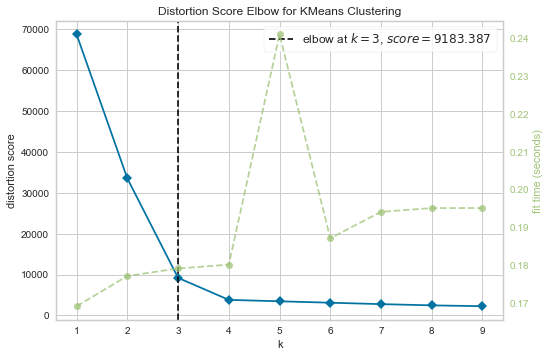

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(X)
visualizer.show()

C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\clust

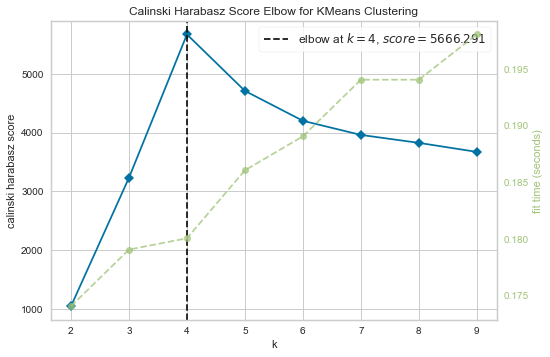

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [16]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='calinski_harabasz')
visualizer.fit(X)
visualizer.show()

C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


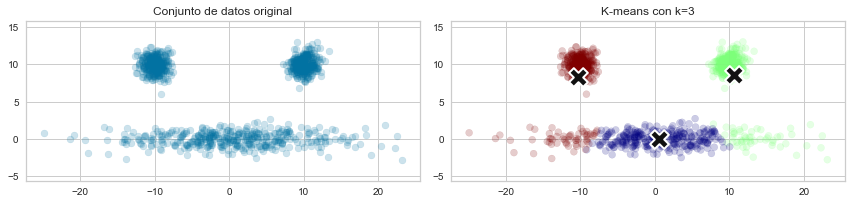

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
XX = np.hstack([np.random.normal(loc=0, scale=8, size=400), np.random.normal(loc=-10, scale=1, size=300), np.random.normal(loc=10, scale=1, size=300)])
YY = np.hstack([np.random.normal(loc=0, scale=1, size=400), np.random.normal(loc=10, scale=1, size=300), np.random.normal(loc=10, scale=1, size=300)])

ax[0].scatter(XX, YY, alpha=.2)
ax[0].axis('equal')
ax[0].set_title('Conjunto de datos original')

data = np.hstack([XX.reshape(-1, 1), YY.reshape(-1, 1)])
model = KMeans(n_clusters=3)
model.fit(data)

ax[1].scatter(XX, YY, c=model.labels_, cmap='jet', alpha=.2)
ax[1].axis('equal')
ax[1].set_title('K-means con k=3')
ax[1].scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=350, c='k', marker='X', linewidths=2, edgecolors='w')

plt.tight_layout()

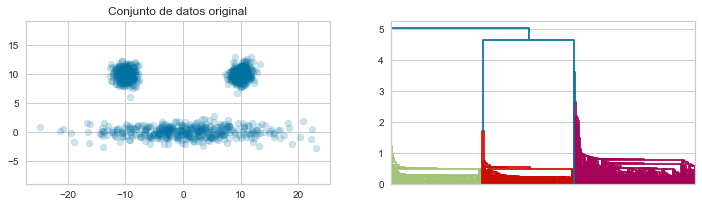

In [18]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
ax[0].scatter(XX, YY, alpha=.2)
ax[0].axis('equal')
ax[0].set_title('Conjunto de datos original')

lin = linkage(pdist(data), 'single')
_ = dendrogram(lin, ax=ax[1], no_labels=True, color_threshold=3.5)


In [19]:
cluster_idx = fcluster(lin, t=3, criterion='distance')

In [20]:
cluster_idx

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

(-27.334847578218806,
 25.538222143282923,
 -3.5770382625012114,
 13.813360232647621)

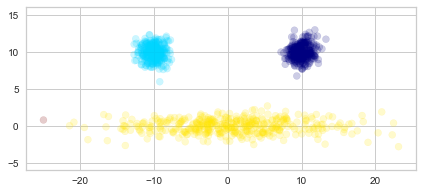

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.scatter(XX, YY, alpha=.2, c=cluster_idx, cmap='jet')
ax.axis('equal')

In [22]:
from sklearn.cluster import MeanShift

model = MeanShift(bandwidth=50, n_jobs=-1)
labels = model.fit_predict(data)

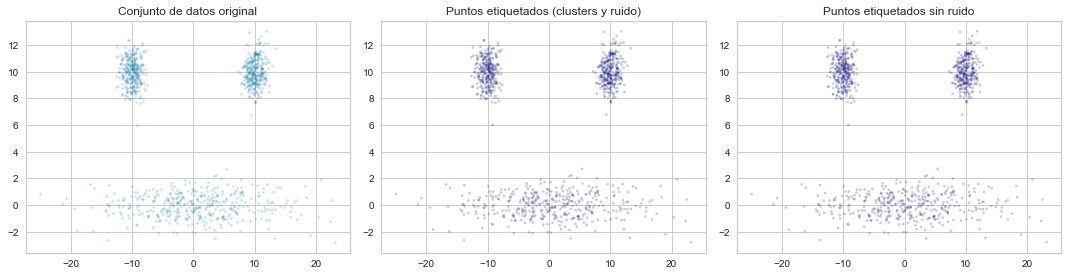

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].scatter(data[:,0], data[:,1], alpha=.2, cmap='jet', s=5)
ax[0].set_title('Conjunto de datos original')
ax[1].scatter(data[:,0], data[:,1], alpha=.2, c=labels, cmap='jet', s=5)
ax[1].set_title('Puntos etiquetados (clusters y ruido)')
ax[2].scatter(data[:,0][labels >= 0], data[:,1][labels >= 0], alpha=.2, c=labels[labels >= 0], cmap='jet', s=5)
ax[2].set_title('Puntos etiquetados sin ruido')
plt.tight_layout()

In [24]:
from sklearn.cluster import DBSCAN

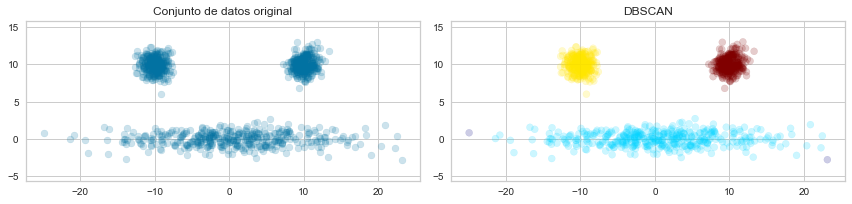

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
ax[0].scatter(XX, YY, alpha=.2)
ax[0].axis('equal')
ax[0].set_title('Conjunto de datos original')
data = np.hstack([XX.reshape(-1, 1), YY.reshape(-1, 1)])
model = DBSCAN(eps=3)
model.fit(data)
ax[1].scatter(XX, YY, c=model.labels_, alpha=.2, cmap='jet')
ax[1].axis('equal')
ax[1].set_title('DBSCAN')

plt.tight_layout()

In [26]:
np.unique(model.labels_, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([  2, 398, 300, 300], dtype=int64))

In [27]:
import pandas as pd
path = r'C:\Users\Usuario\Desktop\Master DATA SCIENCE\09 Aprendizaje no supervisado\barcelona.csv'
geo_df = pd.read_csv(path, header=0)
geo_df.head()

,latitude,longitude
0,41.413766,2.152934
1,41.385719,2.170049
2,41.390911,2.196321
3,41.419326,2.154521
4,41.419326,2.154521


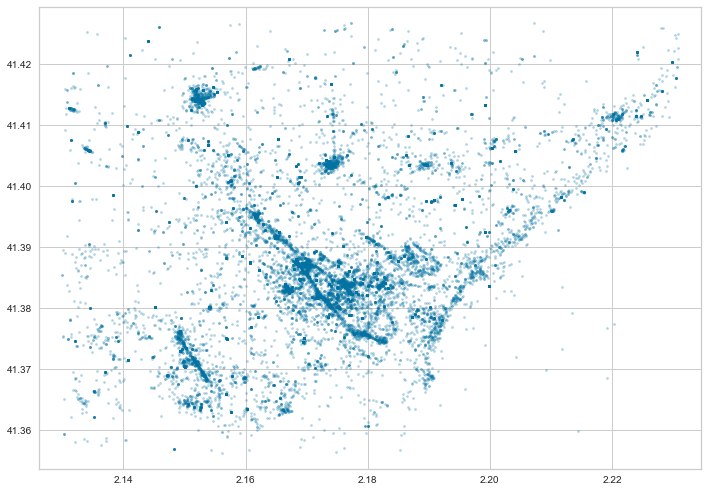

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(geo_df['longitude'], geo_df['latitude'], s=5, alpha=.3)
ax.axis('equal')
plt.tight_layout()

Sampleamos la muestra para agilizar el procecsado

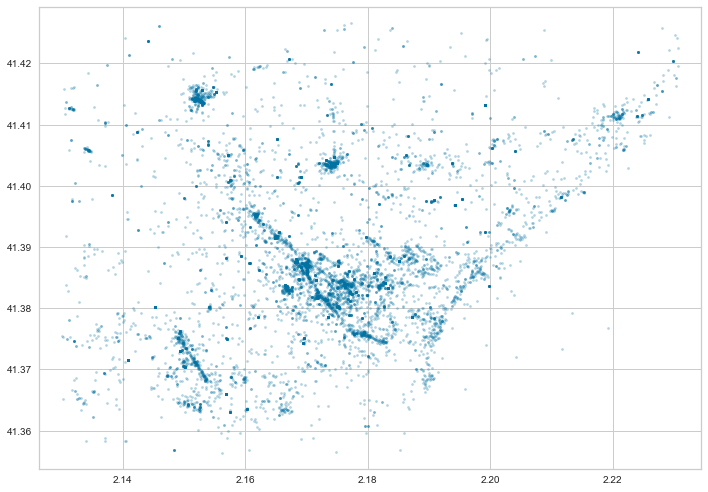

In [29]:
geo_df_sample = geo_df.sample(frac=.5)
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(geo_df_sample['longitude'], geo_df_sample['latitude'], s=5, alpha=.3)
ax.axis('equal')
plt.tight_layout()

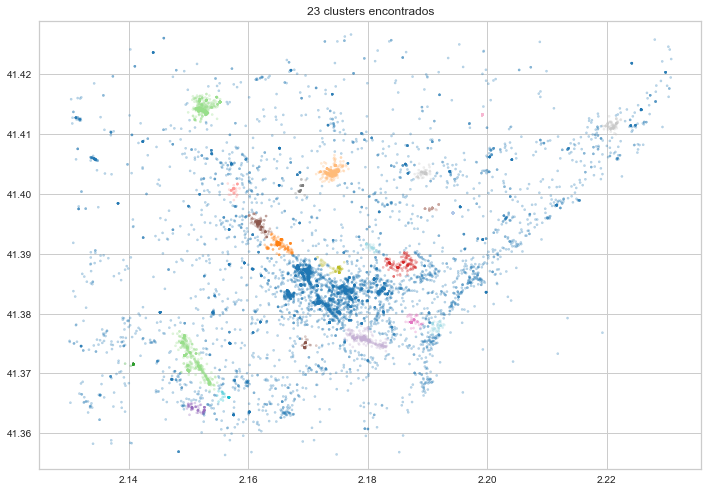

In [30]:
from sklearn import cluster

X = geo_df_sample.values
model = cluster.DBSCAN(eps=0.0011, min_samples=40, n_jobs=-1)
clusters = model.fit(X)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(X[:,1], X[:,0], s=5, c=clusters.labels_, alpha=.3, cmap='tab20')
ax.set_title('{} clusters encontrados'.format(clusters.labels_.max()))
ax.axis('equal')
plt.tight_layout()

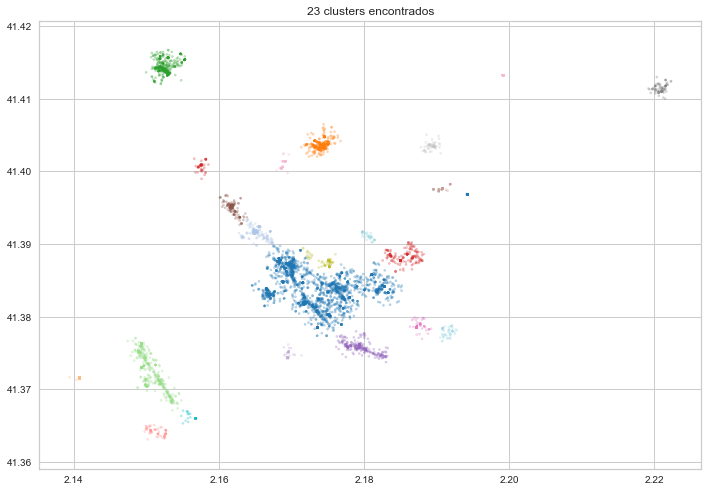

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_title('{} clusters encontrados'.format(clusters.labels_.max()))
ax.scatter(X[:,1][clusters.labels_ >= 0], X[:,0][clusters.labels_ >= 0], s=5,
           c=clusters.labels_[clusters.labels_ >= 0], alpha=.3, cmap='tab20')
ax.axis('equal')
plt.tight_layout()

In [32]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

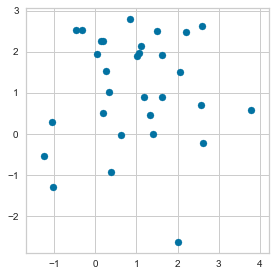

In [33]:
N = 30
X = np.random.normal(loc=1, scale=1, size=N)
Y = np.random.normal(loc=1, scale=1, size=N)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(X, Y)
ax.axis('equal')
plt.tight_layout()

C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differ

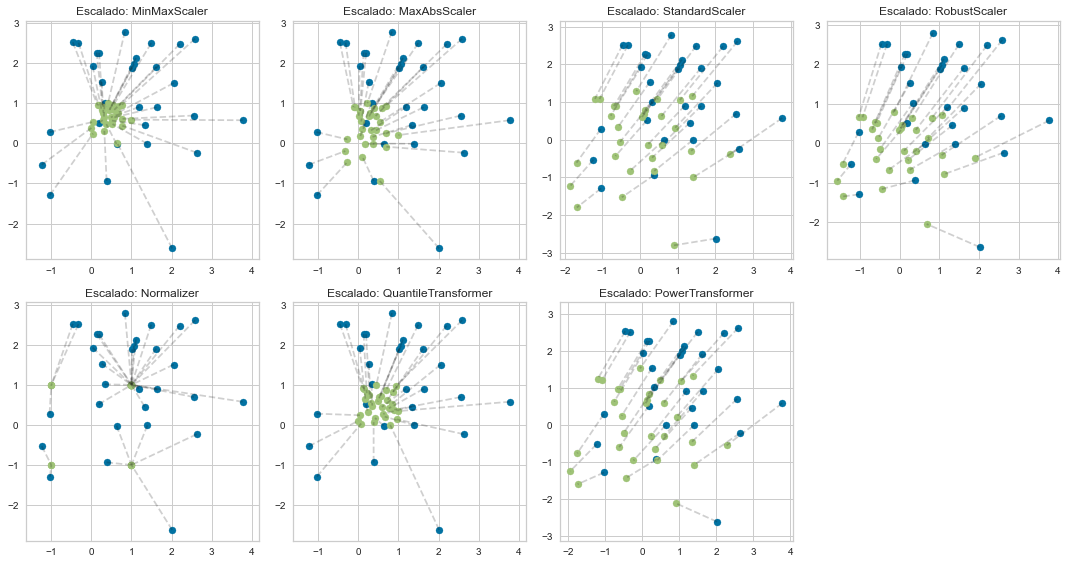

In [34]:
scalers = (MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer)

fig, axis = plt.subplots(2, 4, figsize=(15, 8))
for s, ax in zip(scalers, axis.reshape(-1)):
    X_t = s().fit_transform(X.reshape(-1, 1))
    Y_t = s().fit_transform(Y.reshape(-1, 1))
    for i in range(X.size):
        ax.plot([X[i], X_t[i]], [Y[i], Y_t[i]], 'k--', alpha=.2)
    ax.scatter(X, Y)
    ax.scatter(X_t, Y_t)
    ax.axis('equal')
    ax.set_title('Escalado: ' + s.__name__)
axis.reshape(-1)[-1].axis('off')
plt.tight_layout()

In [35]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42, cluster_std=1.4)

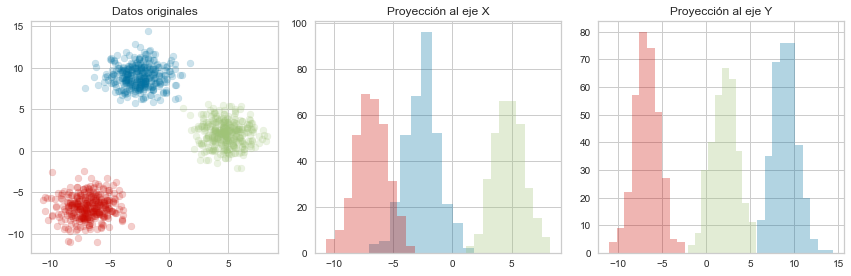

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(X[y==0][:,0], X[y==0][:,1], alpha=.2)
ax[0].scatter(X[y==1][:,0], X[y==1][:,1], alpha=.2)
ax[0].scatter(X[y==2][:,0], X[y==2][:,1], alpha=.2)
ax[0].set_title('Datos originales')
ax[1].hist(X[y==0][:,0], bins=10, alpha=.3)
ax[1].hist(X[y==1][:,0], bins=10, alpha=.3)
ax[1].hist(X[y==2][:,0], bins=10, alpha=.3)
ax[1].set_title('Proyección al eje X')
ax[2].hist(X[y==0][:,1], bins=10, alpha=.3)
ax[2].hist(X[y==1][:,1], bins=10, alpha=.3)
ax[2].hist(X[y==2][:,1], bins=10, alpha=.3)
ax[2].set_title('Proyección al eje Y')

plt.tight_layout()